In [2]:
import pandas as pd
df = pd.read_csv('TSLA.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2572,2020-09-16,439.869995,457.790009,435.309998,441.760010,441.760010,72279300
2573,2020-09-17,415.600006,437.790009,408.000000,423.429993,423.429993,76779200
2574,2020-09-18,447.940002,451.000000,428.799988,442.149994,442.149994,86406800
2575,2020-09-21,453.130005,455.679993,407.070007,449.390015,449.390015,109476800


## Посчитать среднюю цену закрытия акций Tesla, в период с открытия по 10.01.2012

In [9]:
df.index = df.Date
df[['Date', 'Close']]
df[df['Date']<'2012-01-10']['Close'].mean()

5.129875968992248

## Вывести график цены закрытия

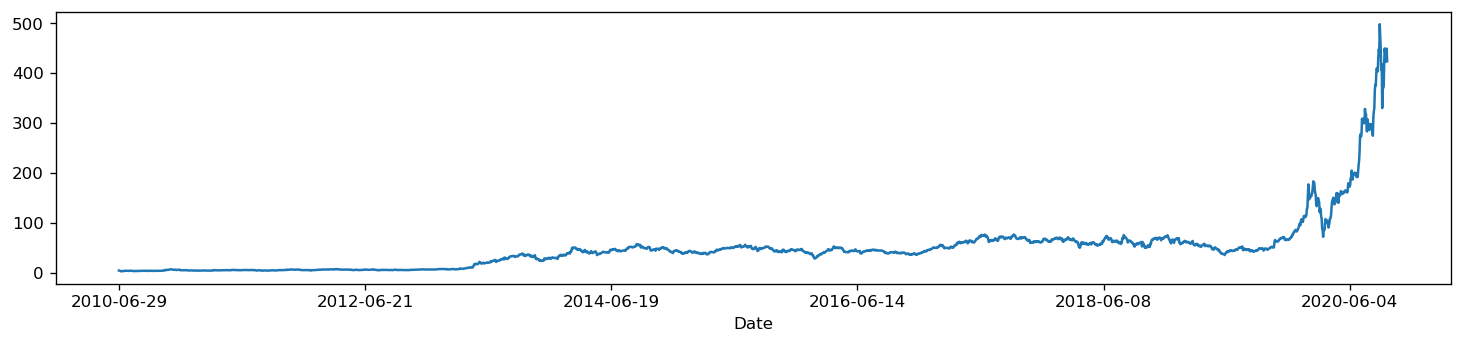

In [18]:
from matplotlib.pyplot import figure, show
figure(figsize=(15, 3), dpi=120)
df['Close'].plot()
show()

## Нормализация

In [19]:
df['Open']

Date
2010-06-29      3.800000
2010-06-30      5.158000
2010-07-01      5.000000
2010-07-02      4.600000
2010-07-06      4.000000
                 ...    
2020-09-16    439.869995
2020-09-17    415.600006
2020-09-18    447.940002
2020-09-21    453.130005
2020-09-22    429.600006
Name: Open, Length: 2577, dtype: float64

In [20]:
max(df.Open)

502.140015

In [21]:
min(df.Open)

3.228

In [22]:
df['Open'].apply(lambda x: ((x - min(df.Open)) / (max(df.Open)-min(df.Open))))

Date
2010-06-29    0.001146
2010-06-30    0.003868
2010-07-01    0.003552
2010-07-02    0.002750
2010-07-06    0.001547
                ...   
2020-09-16    0.875188
2020-09-17    0.826543
2020-09-18    0.891364
2020-09-21    0.901766
2020-09-22    0.854604
Name: Open, Length: 2577, dtype: float64

## SMA (Simple Moving Average). 

<AxesSubplot:xlabel='Date'>

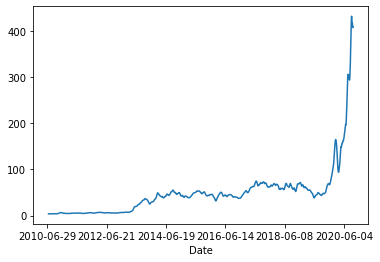

In [27]:
df.Close.rolling(window = 12).mean().plot()

## Построить график с ценой закрытия и посчитаным SMA 12,15,30

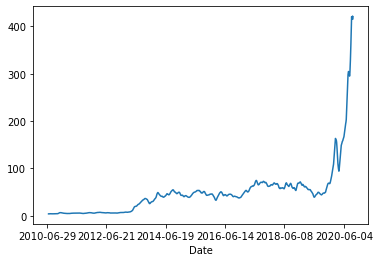

In [25]:
df.Close.rolling(window = 15).mean().plot()
show()

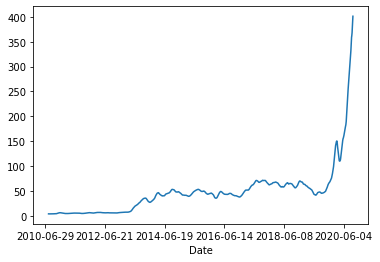

In [26]:
df.Close.rolling(window = 30).mean().plot()
show()

## Удалите из столбца Close значения, целые части которых кратны 6

In [28]:
df.Close = df.Close.apply(lambda x: np.nan if x % 6 == 0 else x)

In [29]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-06-29,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
2010-06-30,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2010-07-01,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2010-07-02,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2010-07-06,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2020-09-16,2020-09-16,439.869995,457.790009,435.309998,441.760010,441.760010,72279300
2020-09-17,2020-09-17,415.600006,437.790009,408.000000,423.429993,423.429993,76779200
2020-09-18,2020-09-18,447.940002,451.000000,428.799988,442.149994,442.149994,86406800


## Теперь попробуйте заполнить пропуски средним значением в столбце, потом минимумом, потом медианой

In [30]:
df.fillna(df.mean())

C:\Users\843E~1\AppData\Local\Temp/ipykernel_11848/634187881.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean())


,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-06-29,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
2010-06-30,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2010-07-01,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2010-07-02,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2010-07-06,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2020-09-16,2020-09-16,439.869995,457.790009,435.309998,441.760010,441.760010,72279300
2020-09-17,2020-09-17,415.600006,437.790009,408.000000,423.429993,423.429993,76779200
2020-09-18,2020-09-18,447.940002,451.000000,428.799988,442.149994,442.149994,86406800


In [31]:
df.fillna(df.min())

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-06-29,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
2010-06-30,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2010-07-01,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2010-07-02,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2010-07-06,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2020-09-16,2020-09-16,439.869995,457.790009,435.309998,441.760010,441.760010,72279300
2020-09-17,2020-09-17,415.600006,437.790009,408.000000,423.429993,423.429993,76779200
2020-09-18,2020-09-18,447.940002,451.000000,428.799988,442.149994,442.149994,86406800


In [32]:
df.fillna(df.median)

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-06-29,2010-06-29,3.800000,5.000000,3.508000,4.778,4.778000,93831500
2010-06-30,2010-06-30,5.158000,6.084000,4.660000,4.766,4.766000,85935500
2010-07-01,2010-07-01,5.000000,5.184000,4.054000,4.392,4.392000,41094000
2010-07-02,2010-07-02,4.600000,4.620000,3.742000,3.84,3.840000,25699000
2010-07-06,2010-07-06,4.000000,4.000000,3.166000,3.222,3.222000,34334500
...,...,...,...,...,...,...,...
2020-09-16,2020-09-16,439.869995,457.790009,435.309998,441.76001,441.760010,72279300
2020-09-17,2020-09-17,415.600006,437.790009,408.000000,423.429993,423.429993,76779200
2020-09-18,2020-09-18,447.940002,451.000000,428.799988,442.149994,442.149994,86406800


## Импортируйте matplotlib.pyplot как plt. Постройте графики получишвихся наборов значений. Чтобы получше разглядеть, найдите как в pyplot задать размер графика и поставьте побольше

<AxesSubplot:xlabel='Date'>

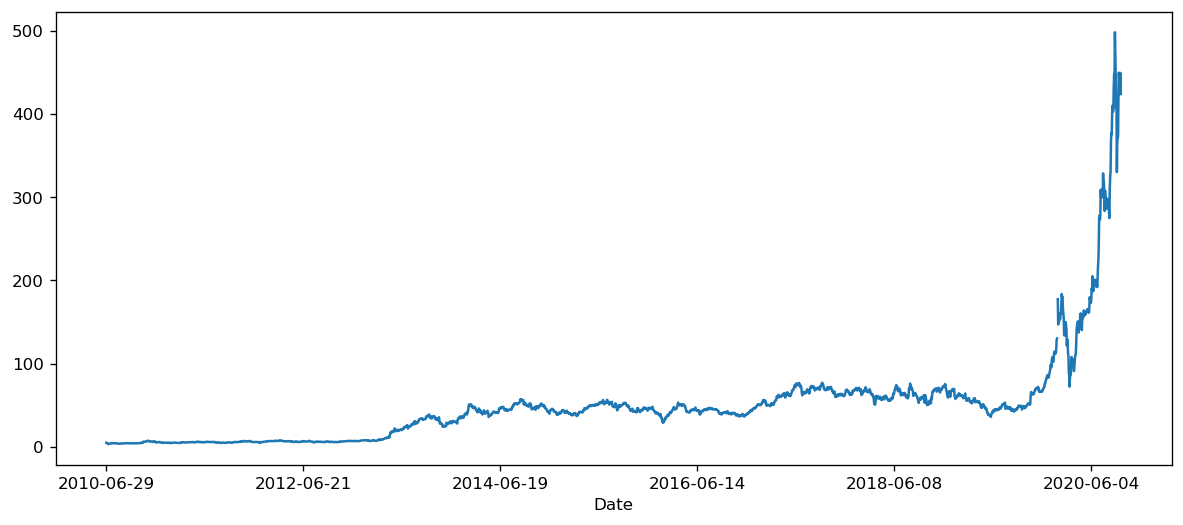

In [34]:
from matplotlib.pyplot import figure
figure(figsize=(12,5), dpi=120)
df.Close.plot()

## Приведите столбец High к строковому типу. Найдите все строки, где содержится цифра 9.

In [35]:
df = df.High.astype("string")
df[(df.str.contains('9') == True)]

Date
2010-08-02         4.194
2010-08-03          4.39
2010-08-09         3.996
2010-08-10          3.93
2010-08-13          3.69
                 ...    
2020-09-10     398.98999
2020-09-15    461.940002
2020-09-16    457.790009
2020-09-17    437.790009
2020-09-21    455.679993
Name: High, Length: 1255, dtype: string

## А теперь найдите в этом столбце строки, которые содержат цифру 4, но не содержат цифру 8.

In [36]:
df[(df.str.contains("4") == True) & (df.str.contains("8") == False)]

Date
2010-07-02          4.62
2010-07-06           4.0
2010-07-08         3.504
2010-07-12         3.614
2010-07-14          4.03
                 ...    
2020-09-16    457.790009
2020-09-17    437.790009
2020-09-18         451.0
2020-09-21    455.679993
2020-09-22     437.76001
Name: High, Length: 827, dtype: string